In [1]:
from pathlib import Path
import pandas as pd

BASE = Path("..") / "data" / "processed"
data_path = BASE / "combined_state_summary_2022.csv"

df = pd.read_csv(data_path)
df.head()


,StateFIPS,State,Abbrev,obesity_rate,smoking_rate,incidence_rate_adj,incidence_cases
0,1,Alabama,AL,35.703,14.895,40.9,2568.0
1,2,Alaska,AK,28.789,14.699,40.8,306.0
2,4,Arizona,AZ,29.385,11.471,31.9,2945.0
3,5,Arkansas,AR,32.196,16.560,41.5,1541.0
4,6,California,CA,23.565,8.590,34.4,15465.0


In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots look a bit nicer
sns.set(style="whitegrid")

BASE = Path("..") / "data" / "processed"
data_path = BASE / "combined_state_summary_2022.csv"

df = pd.read_csv(data_path)
df.head()


,StateFIPS,State,Abbrev,obesity_rate,smoking_rate,incidence_rate_adj,incidence_cases
0,1,Alabama,AL,35.703,14.895,40.9,2568.0
1,2,Alaska,AK,28.789,14.699,40.8,306.0
2,4,Arizona,AZ,29.385,11.471,31.9,2945.0
3,5,Arkansas,AR,32.196,16.560,41.5,1541.0
4,6,California,CA,23.565,8.590,34.4,15465.0


In [4]:
df.shape, df.columns
df.describe()


,StateFIPS,obesity_rate,smoking_rate,incidence_rate_adj,incidence_cases
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,28.960784,29.919588,12.578686,36.919608,2900.607843
std,15.832828,3.996575,2.761359,3.873088,3168.793216
min,1.000000,21.269000,6.167000,29.800000,229.000000
25%,16.500000,27.225000,10.193500,34.050000,797.500000
50%,29.000000,30.275000,13.001000,36.600000,2031.000000
75%,41.500000,32.408000,14.461500,39.450000,3182.000000
max,56.000000,38.131000,19.950000,46.100000,15465.000000


In [5]:
df.nlargest(5, "incidence_rate_adj")[["State", "incidence_rate_adj"]]


,State,incidence_rate_adj
17,Kentucky,46.1
48,West Virginia,44.3
24,Mississippi,43.7
15,Iowa,42.3
18,Louisiana,42.3


In [6]:
df.nsmallest(5, "incidence_rate_adj")[["State", "incidence_rate_adj"]]


,State,incidence_rate_adj
21,Massachusetts,29.8
45,Vermont,30.3
39,Rhode Island,30.9
37,Oregon,31.0
5,Colorado,31.1


In [7]:
df.nlargest(5, "obesity_rate")[["State", "obesity_rate"]]


,State,obesity_rate
48,West Virginia,38.131
18,Louisiana,36.328
24,Mississippi,36.206
36,Oklahoma,36.142
0,Alabama,35.703


In [8]:
df.nlargest(5, "smoking_rate")[["State", "smoking_rate"]]


,State,smoking_rate
48,West Virginia,19.950
42,Tennessee,16.938
17,Kentucky,16.626
3,Arkansas,16.560
24,Mississippi,16.385


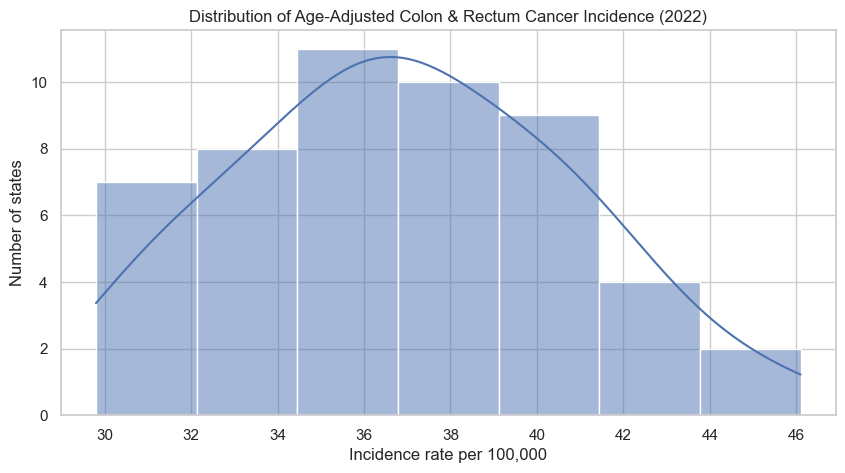

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df["incidence_rate_adj"], kde=True)
plt.title("Distribution of Age-Adjusted Colon & Rectum Cancer Incidence (2022)")
plt.xlabel("Incidence rate per 100,000")
plt.ylabel("Number of states")
plt.show()


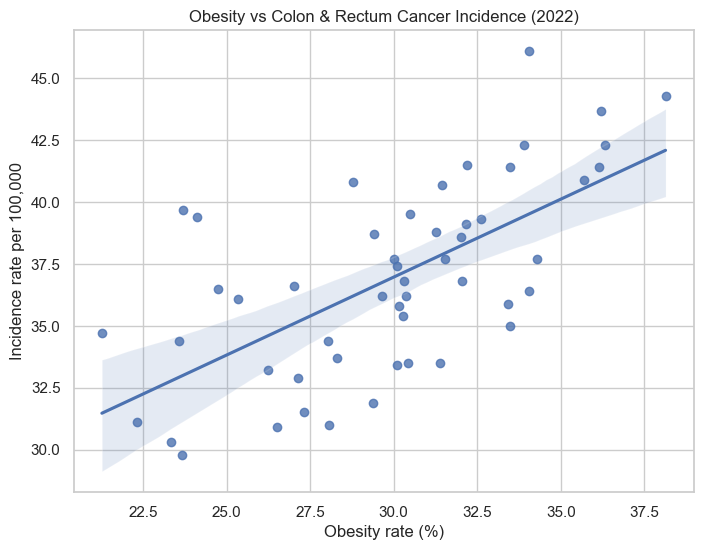

In [10]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="obesity_rate", y="incidence_rate_adj")
plt.title("Obesity vs Colon & Rectum Cancer Incidence (2022)")
plt.xlabel("Obesity rate (%)")
plt.ylabel("Incidence rate per 100,000")
plt.show()


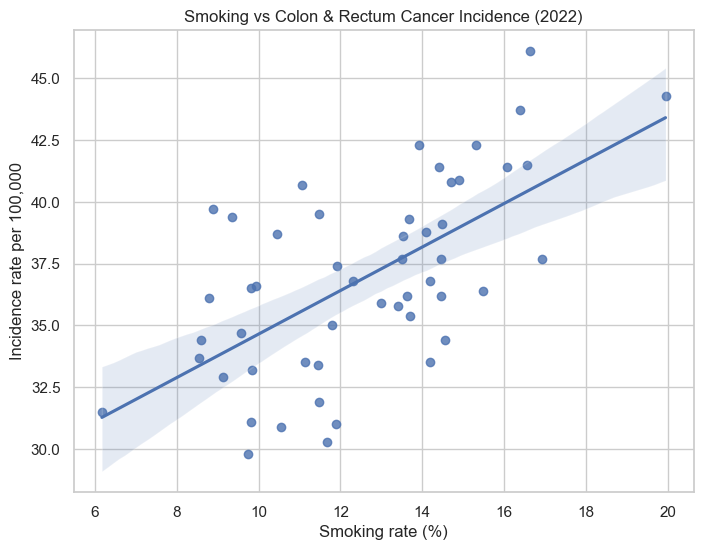

In [11]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="smoking_rate", y="incidence_rate_adj")
plt.title("Smoking vs Colon & Rectum Cancer Incidence (2022)")
plt.xlabel("Smoking rate (%)")
plt.ylabel("Incidence rate per 100,000")
plt.show()


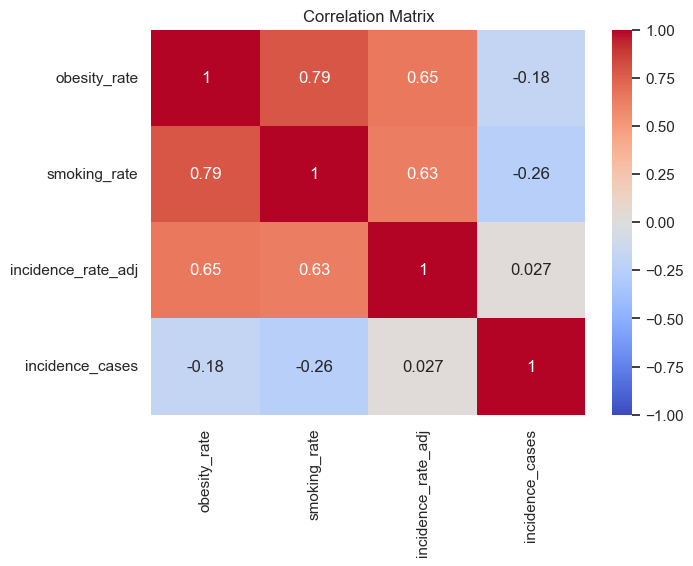

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["obesity_rate", "smoking_rate", "incidence_rate_adj", "incidence_cases"]].corr(),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


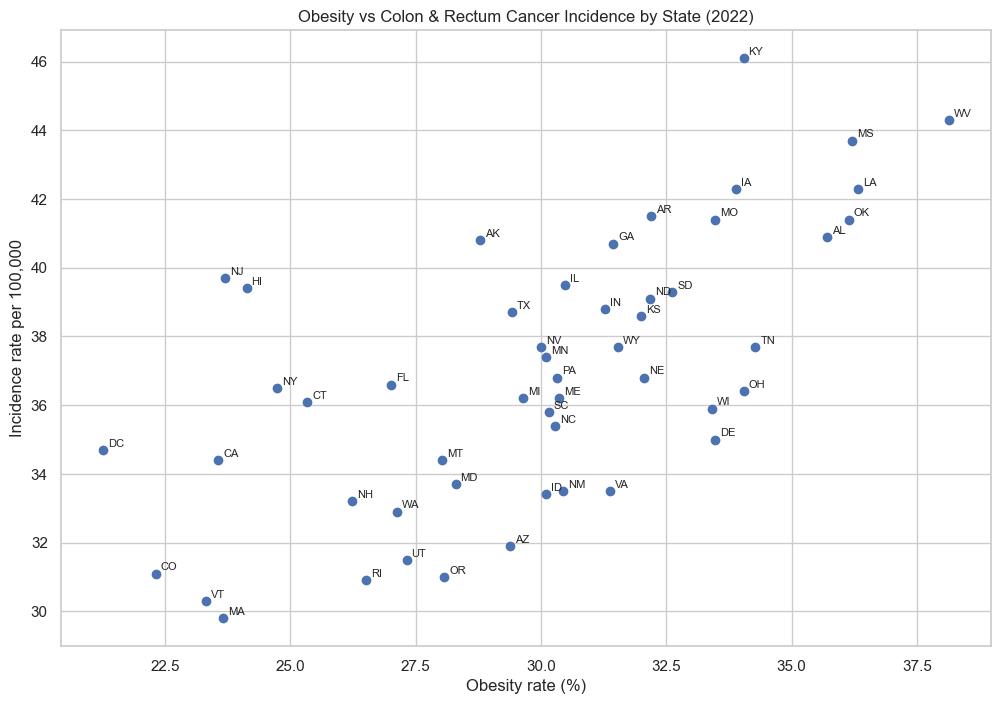

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(df["obesity_rate"], df["incidence_rate_adj"])

for _, row in df.iterrows():
    plt.text(row["obesity_rate"] + 0.1,
             row["incidence_rate_adj"] + 0.1,
             row["Abbrev"],
             fontsize=8)

plt.xlabel("Obesity rate (%)")
plt.ylabel("Incidence rate per 100,000")
plt.title("Obesity vs Colon & Rectum Cancer Incidence by State (2022)")
plt.show()
